In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.items()

[('measurement', sqlalchemy.ext.automap.measurement),
 ('station', sqlalchemy.ext.automap.station)]

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).first()[0]
recent_date


'2017-08-23'

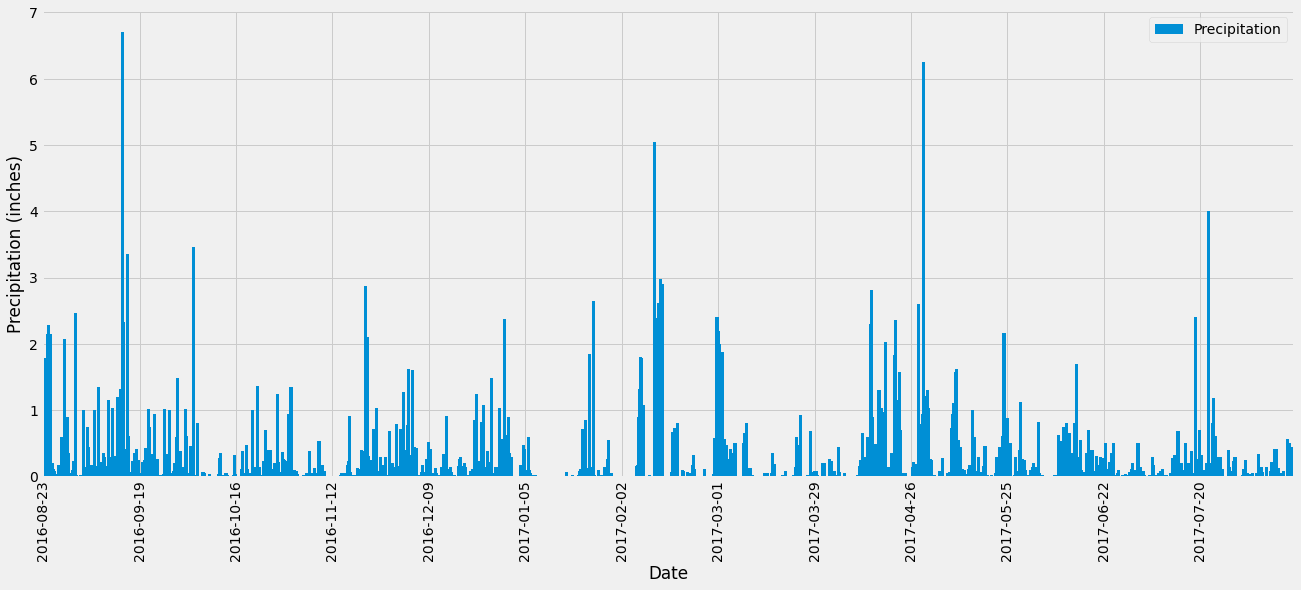

In [41]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_away = dt.datetime.strptime(recent_date,"%Y-%m-%d") - dt.timedelta(days=365)
one_year_away_str = one_year_away.strftime("%Y-%m-%d")

# Perform a query to retrieve the data and precipitation scores
one_year_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_away_str).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
one_year_df = pd.DataFrame(one_year_data).rename(columns={'prcp':'Precipitation', 'date':'Date'})
# Sort the dataframe by date
sorted_df = one_year_df.sort_values("Date").reset_index(drop=True)
# Use Pandas Plotting with Matplotlib to plot the data

prcp_plot = sorted_df.plot(kind="bar", x='Date', y='Precipitation',figsize=(20,8), width=5.5)
plt.locator_params(axis='x', nbins=13, tight=True)
plt.ylabel("Precipitation (inches)")
plt.show()



In [35]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_df["prcp"].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [45]:
# Design a query to calculate the total number stations in the dataset
total_station = session.query(func.count(Station.station)).first()[0]
total_station

9

In [52]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_row_count = session.query(Measurement.station, func.count()).group_by(Measurement.station).order_by(func.count().desc()).all()
station_row_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [56]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = station_row_count[0][0]
temp_summary = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == most_active).first()
print(f"Lowest Temperature: {temp_summary[0]}\n"
        f"Highest Temperature: {temp_summary[1]}\n"
        f"Average Temperature: {temp_summary[2]}\n")

Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067



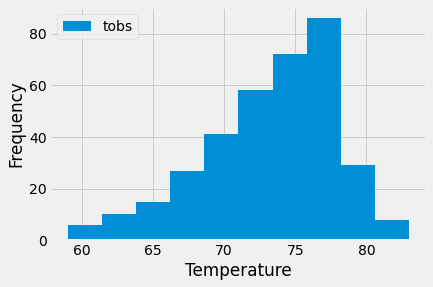

In [64]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_last_year = session.query(Measurement.tobs).filter(Measurement.station == most_active, Measurement.date >= one_year_away_str).all()
most_active_last_year_df = pd.DataFrame(most_active_last_year)
most_active_last_year_df.plot(kind='hist')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [65]:
# Close Session
session.close()